### Exploratory Data Analysis

**Objetivo:** Mi análisis va a estar orientado en las oportunidades de crecimiento en cuanto a la infraestructura y a la penetración. Para dicho análisis voy a utilizar del Dataset "Internet" y voy a analizar los siguientes aspectos:
- Comparación entre la cantidad de accesos por tecnología en cada ##**provincia o localidad**## para detectar cuáles tienen una menor penetración de tecnologías más modernas o eficientes.
- Identificar ##**provincias o localidades**## con baja cantidad de accesos por cada 100 habitantes y cada 100 hogares para enfocar allí las oportunidades de crecimiento.
- Analizar el crecimiento o disminución de accesos por tecnología en distintos años y trimestres. 

Voy a complementar dicha información con los datos obtenidos del Dataset "Mapa de conectividad" del cual voy a analizar tales cosas... **Completar**

Como primer paso voy a importar el Dataset "Internet" para poder comenzar con el análisis. Unicamente voy a trabajar con **6** de las 12 hojas que lo conforma según mis objetivos del análisis. Las hojas seleccionadas son:
- Hoja 3: accesos por provincia, partido y localidad por cada tipo de tecnología de acceso.
- Hoja 6: Total de accesos por tecnología por año y trimestre.
- Hoja 7: accesos por tecnología por año, trimestre y provincia.
- Hoja 8: accesos por cada 100 habitantes por provincia, año y trimestre.
- Hoja 9: accesos por cada 100 hogares por provincia, año y trimestre.
- Hoja 10: total de accesos por cada 100 habitantes y hogares por año y trimestre. **EVALUAR SI LA DEJO O SI NO LA DEJO**

In [67]:
# Importo librerías necesarias
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Importo el archivo "Internet" a partir de la funcion ExcelFile
dataset_internet = pd.ExcelFile("./Datasets/Internet.xlsx")

In [43]:
# Dataframes de las hojas que voy a utilizar

#Hoja 3
hoja_tres = pd.read_excel(dataset_internet, sheet_name=2)
hoja_tres.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [32]:
#Hoja 6
hoja_seis = pd.read_excel(dataset_internet, sheet_name=5)
hoja_seis.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
1,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
2,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
3,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023
4,2023,1,1204417,6002582,3243411,576647,214838,11241895,Ene-Mar 2023


In [33]:
#Hoja 7
hoja_siete = pd.read_excel(dataset_internet, sheet_name=6)
hoja_siete.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [34]:
#Hoja 8
hoja_ocho = pd.read_excel(dataset_internet, sheet_name=7)
hoja_ocho.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [35]:
#Hoja 9
hoja_nueve = pd.read_excel(dataset_internet, sheet_name=8)
hoja_nueve.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [36]:
#Hoja 10  #EVALUAR SI LA DEJO O SI NO LA DEJO. 
hoja_diez = pd.read_excel(dataset_internet, sheet_name=9)
hoja_diez.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


Para realizar el análisis del primer ítem detallado anteriormente acerca de la comparación entre la cantidad de accesos por tecnología en cada ##**provincia o localidad**## para detectar cuáles tienen una menor penetración de tecnologías más modernas o eficientes, voy a utilizar el dataframe creado a partir de la hoja 3.

In [50]:
hoja_tres

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3348,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3349,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3350,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0


In [51]:
# Relizo una copia del mismo
hoja_tres_copia = hoja_tres.copy()

Como primer paso para trabajar sobre dicho Dataframe voy a realizar una búsqueda de valores faltantes.

In [52]:
hoja_tres_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


Podemos observar que existen datos faltantes. A partir de dicha información y de la observación del dataframe puedo detectar filas totalmente vacías por lo que voy a eliminarlas.

In [56]:
hoja_tres_copia = hoja_tres_copia.dropna(how='any')
hoja_tres_copia

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7422,0,0,0,0,7422
3068,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3069,TUCUMAN,Trancas,Villa de Trancas,90112030,95,0,0,0,33,0,0,71,199
3070,TUCUMAN,Yerba Buena,Villa Carmela,90119020,636,0,0,0,1,0,0,79,716


Voy a analizar la existencia de outliers, para ello, voy a calcular el  Z-score.

In [78]:
# Importo librería necesaria
import numpy as pd

# Filtro las columnas de tecnologías
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Calculo el Z-score para cada tecnología
df_zscore = hoja_tres_copia[tecnologias].apply(lambda x: (x- x.mean()) / x.std())

# Defino umbral de Z-score para detectar outliers
threshold = 3
outliers = df_zscore[(df_zscore > threshold) | (df_zscore < -threshold)].dropna(how='all')
outliers


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,NaN,NaN,NaN,NaN,NaN,54.444941,NaN,NaN
58,NaN,4.451508,8.896387,NaN,NaN,NaN,NaN,3.420611
76,NaN,NaN,NaN,3.156961,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017186
146,NaN,NaN,NaN,NaN,NaN,NaN,29.351296,NaN
...,...,...,...,...,...,...,...,...
2728,5.291733,7.136385,NaN,20.641220,NaN,NaN,NaN,6.687951
2894,NaN,3.324487,NaN,NaN,NaN,NaN,NaN,NaN
2995,3.692016,NaN,3.037424,NaN,NaN,NaN,NaN,NaN
2998,NaN,NaN,3.847952,NaN,NaN,NaN,NaN,NaN


*Análisis del resultado:* Las celdas que tienen NaN no tienen outliers. Esto es porque dichos valores no superan el umbral definido para considerar un valor como outlier. Por otro lado, los valores que están muy alejados de la media son aquellos que sí tienen un valor y son considerados outliers. 
A continuación voy a filtrar las localidades con outiers 

In [60]:
# Importo librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

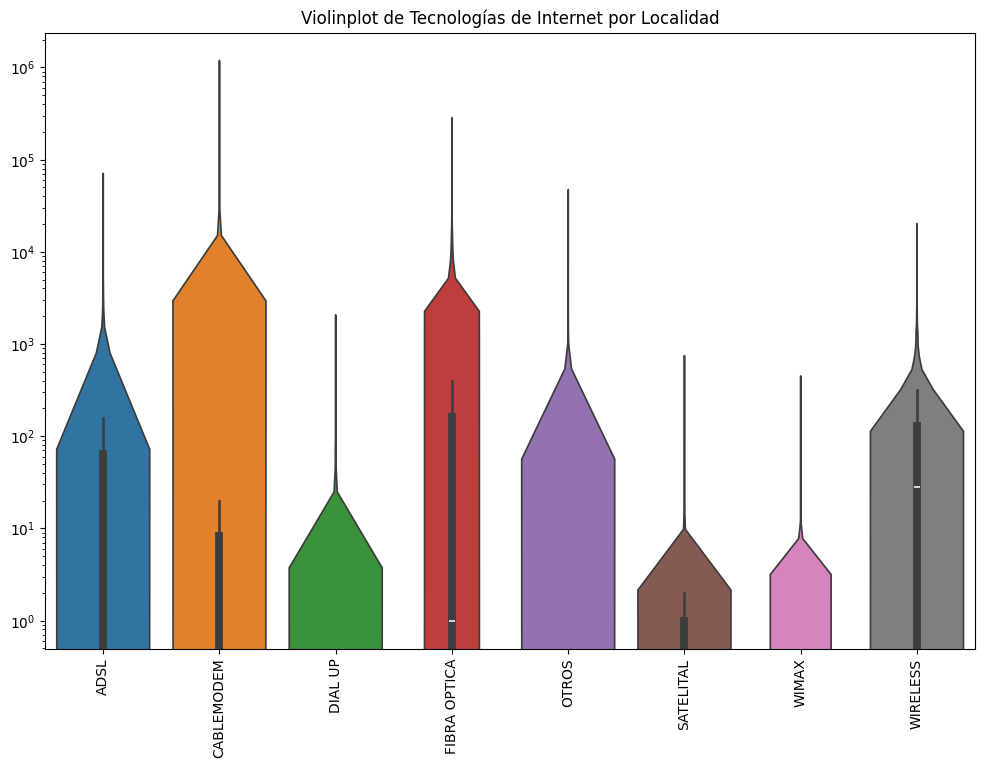

In [69]:
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
plt.figure(figsize=(12, 8))
sns.violinplot(data=hoja_tres_copia[tecnologias], scale="width")
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Violinplot de Tecnologías de Internet por Localidad')
plt.show()